In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../data/boston_housing.csv')

In [6]:
# 1. Handle Missing Values
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [7]:
# # If there were missing values, we could impute them (e.g., with median), but this dataset has none.
# # For demonstration, let's assume we impute with median if any were present:
# for column in df.columns:
#     if df[column].isnull().sum() > 0:
#         df[column].fillna(df[column].median(), inplace=True)

In [8]:
# 2. Encode Categorical Variables
# 'chas' is binary (0 or 1), already suitable for modeling, no encoding needed.
# 'rad' is an index (1-24), could be treated as categorical or ordinal. We'll one-hot encode it.
df_encoded = pd.get_dummies(df, columns=['rad'], prefix='rad', drop_first=True)  # Avoid multicollinearity

In [9]:
# 3. Normalize/Standardize Numerical Features
# Separate features and target
X = df_encoded.drop('medv', axis=1)
y = df_encoded['medv']

In [10]:
# List of numerical columns (excluding 'chas' which is binary, and 'rad' which is now encoded)
numerical_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat']

In [11]:
# 4. Standardize features (mean=0, std=1)
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nFirst 5 rows of standardized features:")
print(X.head())


First 5 rows of standardized features:
       crim        zn     indus  chas       nox        rm       age       dis  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        tax   ptratio         b     lstat  rad_2  rad_3  rad_4  rad_5  rad_6  \
0 -0.666608 -1.459000  0.441052 -1.075562  False  False  False  False  False   
1 -0.987329 -0.303094  0.441052 -0.492439   True  False  False  False  False   
2 -0.987329 -0.303094  0.396427 -1.208727   True  False  False  False  False   
3 -1.106115  0.113032  0.416163 -1.361517  False   True  False  False  False   
4 -1.106115  0.113032  0.441052 -1.026501  False   True  False  False  Fa

In [12]:
# 5. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (404, 20) (404,)
Testing set shape: (102, 20) (102,)


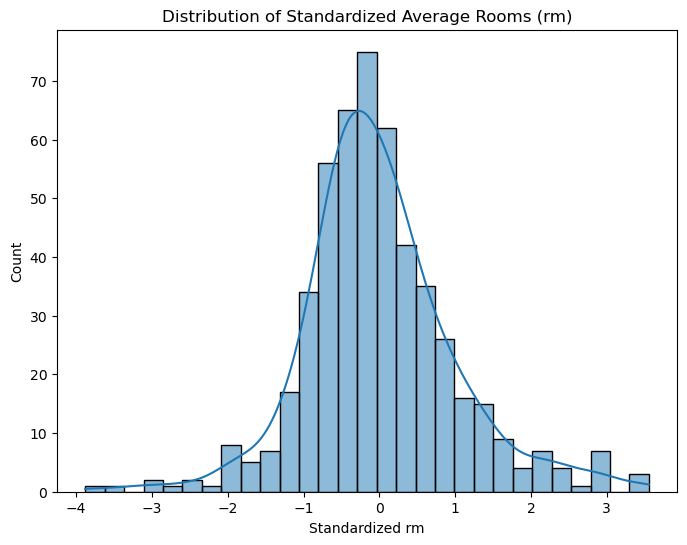

In [13]:
# Optional: Visualize distribution of a standardized feature
plt.figure(figsize=(8, 6))
sns.histplot(X['rm'], kde=True)
plt.title('Distribution of Standardized Average Rooms (rm)')
plt.xlabel('Standardized rm')
plt.show()